In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [61]:

df = pd.read_csv(r'C:\coding D\Cpp\coding\assignments\Python scripts\datasourcefiles\firecrackers\overalldata.csv')
print(df.head())

   CustomerID CustomerName  Gender  Age Marital_Status           State  \
0        3102   Customer_1  Female   33        Married           Delhi   
1        3435   Customer_2  Female   30        Married           Bihar   
2        3860   Customer_3    Male   59         Single  Madhya Pradesh   
3        3270   Customer_4  Female   47        Married           Bihar   
4        3106   Customer_5    Male   36         Single     Maharashtra   

     City  Occupation Product_Name  Price  Quantity_Sold  Discount(%)  \
0  Mumbai     Student      Rockets    545              3            6   
1  Mumbai   Education       Chakri    769              3           21   
2   Patna     Student      Rockets    732              2           16   
3   Patna  Healthcare    Sparklers    154              1           16   
4  Mumbai          IT    Sparklers   1011              4            1   

   PaymentMode        Date  Total_Amount       Profit  
0  Net Banking  2024-10-26       1536.90   449.850397  
1   

popularity of crackers
Product_Name
Sparklers      100415
Bombs           98591
Flower Pots     97228
Rockets         94187
Chakri          81563
Name: popularity, dtype: int64


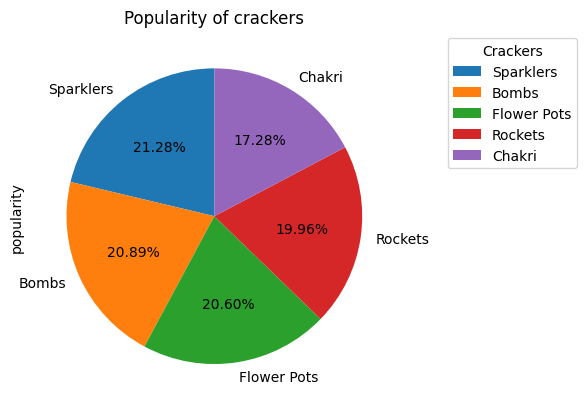

In [62]:
print('popularity of crackers')

df['popularity'] = df['Price'] * df['Quantity_Sold']
popularity = df.groupby('Product_Name', as_index = True)['popularity'].sum().sort_values(ascending = False)
print(popularity)

pallete = ['voilet', 'blue', 'red', 'orange', 'green']
ax = popularity.plot(kind = 'pie', autopct = '%1.2f%%', startangle = 90, legend = True, color = pallete)

plt.title('Popularity of crackers')
plt.legend(title = 'Crackers', bbox_to_anchor = (1.5,1), loc = 'upper right')
plt.show()


Profit calculator for each cracker
  Product_Name  profit percentage
0        Bombs              13.17
4    Sparklers              13.04
2  Flower Pots              12.88
3      Rockets              12.55
1       Chakri               9.46


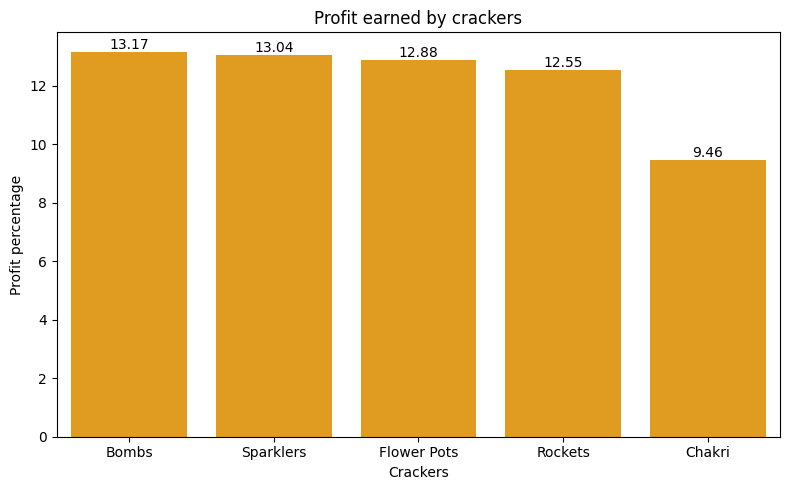

In [63]:
print('Profit calculator for each cracker')
df['profit percentage'] = df['Profit']/df['Total_Amount']
profit_percentage = df.groupby('Product_Name', as_index = False)['profit percentage'].sum().sort_values(by = 'profit percentage', ascending=False).round(2)
print(profit_percentage)

plt.figure(figsize = (8,5))
ax = sns.barplot(data = profit_percentage, x = 'Product_Name', y = 'profit percentage',color = 'orange')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Profit earned by crackers')
plt.xlabel('Crackers')
plt.ylabel('Profit percentage')
plt.tight_layout()
plt.show()

Sales of crackers per state
            State  Total_Amount
4   Uttar Pradesh      97840.10
3     Maharashtra      84543.62
0           Bihar      83290.10
1           Delhi      78422.59
2  Madhya Pradesh      70779.95


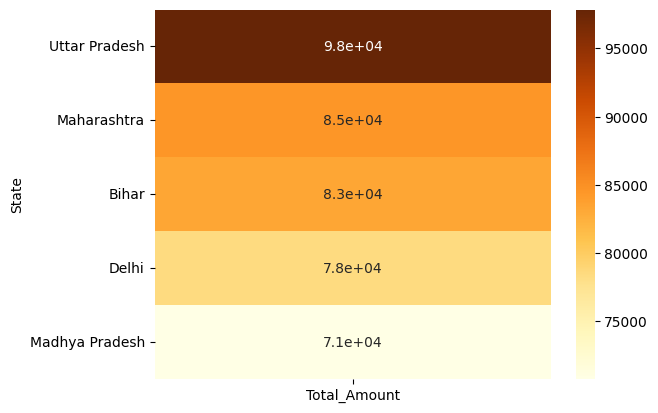

In [64]:
print('Sales of crackers per state')
state_sales = df.groupby('State', as_index = False)['Total_Amount'].sum().sort_values(by = 'Total_Amount', ascending = False)
print(state_sales)

state_sales_pivot = state_sales.set_index('State')
ax = sns.heatmap(state_sales_pivot, annot = True, cmap='YlOrBr')
plt.show()

Classification of payment method
PaymentMode
Cash           88990.62
Credit Card    90726.39
Debit Card     74127.73
Net Banking    99023.13
UPI            62008.49
Name: Total_Amount, dtype: float64


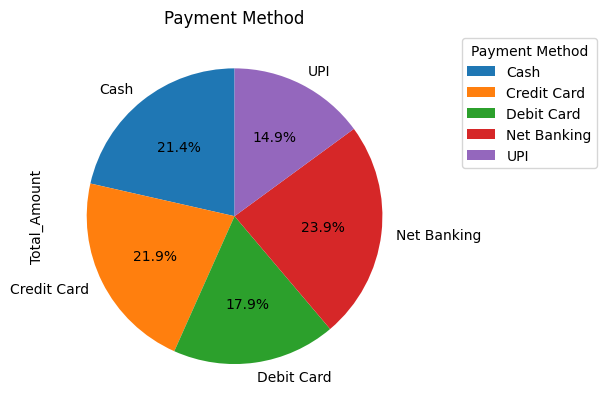

In [65]:
print('Classification of payment method')
payment_method = df.groupby('PaymentMode', as_index = True)['Total_Amount'].sum()
print(payment_method)

ax = payment_method.plot(kind = 'pie', autopct = '%1.1f%%', legend = True, startangle = 90)
plt.title('Payment Method')
plt.legend(title = 'Payment Method', loc = 'upper right', bbox_to_anchor = (1.5,1))
plt.show()

Sales trend
Date
2024-10-25    42867.65
2024-10-26    43531.71
2024-10-27    46046.51
2024-10-28    28853.49
2024-10-29    43817.74
2024-10-30    53262.61
2024-10-31    46437.63
2024-11-01    43394.79
2024-11-02    40985.56
2024-11-03    25678.67
Name: Total_Amount, dtype: float64


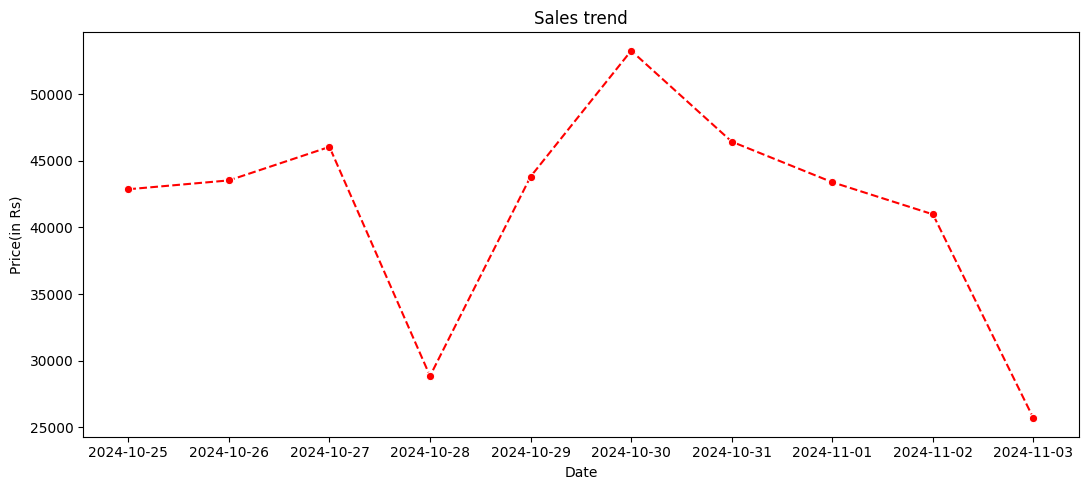

In [66]:
print('Sales trend')
sales_trend = df.groupby('Date')['Total_Amount'].sum()
print(sales_trend)

plt.figure(figsize = (11,5))
ax = sns.lineplot(data = sales_trend, linestyle = 'dashed', marker = 'o', color = 'red')
plt.title('Sales trend')
plt.xlabel('Date')
plt.ylabel('Price(in Rs)')
plt.tight_layout()
plt.show()